In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
train = pd.read_csv('../data/train_3.csv')
X_test = pd.read_csv('../data/test.csv')
y_train = train['Y']
X_train = train.drop('Y', axis=1)
train.head()

,Y,X1,X2,X12,X15
0,12.083210,16,7,6,6
1,12.433754,19,14,11,5
2,11.659181,12,14,8,5
3,15.449989,21,2,10,11
4,12.805393,11,11,8,4


In [46]:
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=1)
model = RandomForestRegressor(max_depth=5, random_state=0)
rf_scores = cross_val_score(model, X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=cv, n_jobs=-1)
rf_scores = np.abs(rf_scores)

In [47]:
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=1)
pipe = make_pipeline(StandardScaler(), Ridge())
ridge_scores = cross_val_score(pipe, X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=cv, n_jobs=-1)
ridge_scores = np.abs(ridge_scores)

In [48]:
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=1)
pipe = make_pipeline(StandardScaler(), Lasso())
lasso_scores = cross_val_score(pipe, X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=cv, n_jobs=-1)
lasso_scores = np.abs(lasso_scores)

In [49]:
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=1)
model = GradientBoostingRegressor(random_state=0)
gb_scores = cross_val_score(model, X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=cv, n_jobs=-1)
gb_scores = np.abs(gb_scores)

In [50]:
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=1)
pipe = make_pipeline(StandardScaler(), SVR(kernel='linear'))
svr_scores = cross_val_score(pipe, X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=cv, n_jobs=-1)
svr_scores = np.abs(svr_scores)

In [51]:
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=1)
model = XGBRegressor()
xgb_scores = cross_val_score(model, X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=cv, n_jobs=-1)
xgb_scores = np.abs(xgb_scores)

[Text(0.5, 0, 'Models'),
 Text(0, 0.5, 'MSE'),
 Text(0.5, 1.0, 'MSPE for Initial Models')]

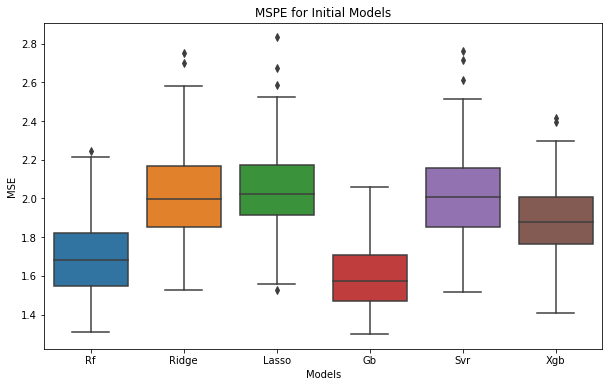

In [52]:
results_df = dataset = pd.DataFrame({'Rf': rf_scores, 'Ridge': ridge_scores, 'Lasso': lasso_scores, 'Gb': gb_scores, 'Svr': svr_scores, 'Xgb': xgb_scores})
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=results_df)
ax.set(xlabel='Models', ylabel='MSE', title='MSPE for Initial Models')